<a href="https://colab.research.google.com/github/RahmiaWati431/KematanganTomatMenggunakanMachineLearning/blob/main/SVMsplitPakaiCrop60_40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.listdir('/content/drive/MyDrive/Penelitian/DatasetBuah'))

['Matang', 'Mentah', 'SetengahMatang']


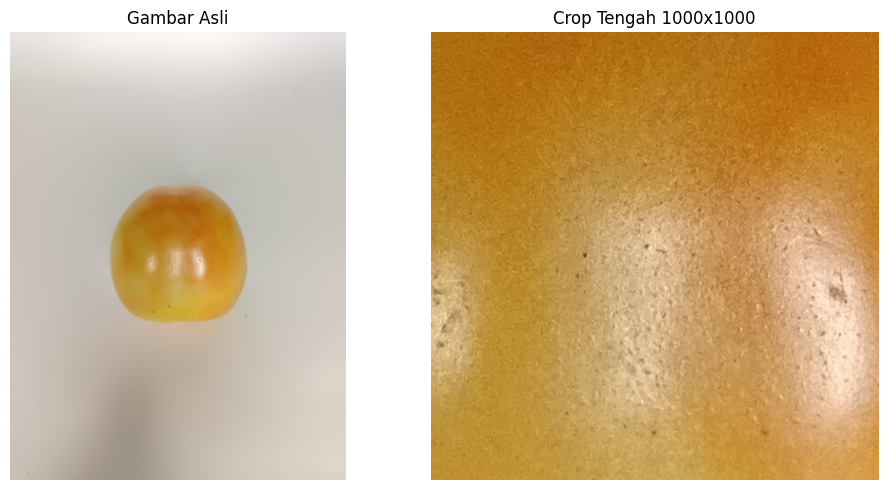

Jumlah data per label:
Label
Mentah            70
SetengahMatang    70
Matang            70
Name: count, dtype: int64

Contoh data dari masing-masing label:

Label: Mentah


,Filename,R,G,B,Label
0,IMG_20250306_201145.jpg,162.933658,164.934614,50.085563,Mentah
1,IMG_20250306_201150.jpg,163.484790,166.546658,45.983442,Mentah
2,IMG_20250306_201155.jpg,196.092080,194.021471,119.780415,Mentah
3,IMG_20250306_201158.jpg,185.391831,183.194732,112.118555,Mentah
4,IMG_20250306_201204.jpg,171.858500,166.461075,68.477751,Mentah
...,...,...,...,...,...
65,IMG_20250306_203254.jpg,186.338844,184.443387,94.293238,Mentah
66,IMG_20250306_203259.jpg,154.806017,154.689243,41.798220,Mentah
67,IMG_20250306_203319.jpg,186.785364,181.789629,90.666736,Mentah
68,IMG_20250306_203333.jpg,171.598127,165.630611,57.984172,Mentah



Label: SetengahMatang


,Filename,R,G,B,Label
70,IMG_20250306_201854.jpg,188.963044,90.247793,53.040713,SetengahMatang
71,IMG_20250306_201859.jpg,178.619939,89.351706,34.021877,SetengahMatang
72,IMG_20250306_201903.jpg,164.388198,59.317674,25.718688,SetengahMatang
73,IMG_20250306_201910.jpg,195.453309,145.907095,72.204596,SetengahMatang
74,IMG_20250306_201913.jpg,181.168827,127.445908,56.165545,SetengahMatang
...,...,...,...,...,...
135,IMG_20250306_203414.jpg,169.303050,72.774617,28.092279,SetengahMatang
136,IMG_20250306_203409.jpg,191.433848,136.322600,53.044829,SetengahMatang
137,IMG_20250306_203435.jpg,178.587546,89.207425,37.059519,SetengahMatang
138,IMG_20250306_203509.jpg,170.686620,75.069495,31.804819,SetengahMatang



Label: Matang


,Filename,R,G,B,Label
140,IMG_20250306_200431.jpg,164.658293,67.673786,44.212780,Matang
141,IMG_20250306_200437.jpg,162.379965,71.657141,48.848549,Matang
142,IMG_20250306_200443.jpg,159.630333,47.225922,42.825737,Matang
143,IMG_20250306_200450.jpg,152.179997,32.930651,28.975574,Matang
144,IMG_20250306_200456.jpg,176.902459,59.589780,42.802556,Matang
...,...,...,...,...,...
205,IMG_20250306_203101.jpg,137.197892,23.980215,16.067208,Matang
206,IMG_20250306_203110.jpg,146.540599,32.774095,18.510301,Matang
207,IMG_20250306_203140.jpg,142.928191,25.759740,22.497978,Matang
208,IMG_20250306_203157.jpg,146.867522,31.209589,19.439701,Matang



✅ Data berhasil disimpan ke csv di: /content/drive/MyDrive/Penelitian/Berkas/Crop/DatasetTomatcrop.csv


In [ ]:
# Tahap 3: Ekstraksi Fitur RGB dari Gambar (Crop Tengah 1000x1000)
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Path ke folder utama dataset
base_path = '/content/drive/MyDrive/Penelitian/DatasetBuah'

# Label sesuai nama subfolder (pastikan sama persis!)
labels = ['Mentah', 'SetengahMatang', 'Matang']
data = []

# Fungsi ekstrak rata-rata warna RGB dari bagian tengah gambar
def extract_rgb(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Gambar tidak terbaca")

    h, w, _ = img.shape
    start_x = w // 2 - 500
    start_y = h // 2 - 500
    crop = img[start_y:start_y+1000, start_x:start_x+1000]
    rgb_crop = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
    avg_color = rgb_crop.mean(axis=0).mean(axis=0)  # RGB
    return avg_color[0], avg_color[1], avg_color[2]

# Fungsi untuk menampilkan gambar asli dan hasil crop
def show_original_vs_crop(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape
    start_x = w // 2 - 500
    start_y = h // 2 - 500
    crop = img[start_y:start_y+1000, start_x:start_x+1000]
    crop_rgb = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title('Gambar Asli')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(crop_rgb)
    plt.title('Crop Tengah 1000x1000')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Contoh tampilkan visualisasi dari satu gambar:
contoh_gambar = '/content/drive/MyDrive/Penelitian/DatasetBuah/SetengahMatang/IMG_20250306_201910.jpg'
show_original_vs_crop(contoh_gambar)


# Proses semua gambar dari setiap folder label
for label in labels:
    folder = os.path.join(base_path, label)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        try:
            r, g, b = extract_rgb(img_path)
            data.append([img_name, r, g, b, label])
        except Exception as e:
            print(f"Gagal memproses {img_path}: {e}")

# Simpan jadi DataFrame
df = pd.DataFrame(data, columns=['Filename', 'R', 'G', 'B', 'Label'])

# Lihat jumlah data per label
print("Jumlah data per label:")
print(df['Label'].value_counts())

# Tampilkan beberapa data pertama dari tiap label
print("\nContoh data dari masing-masing label:")
for label in labels:
    print(f"\nLabel: {label}")
    display(df[df['Label'] == label].head(70))

# Simpan DataFrame ke file Excel
output_path = '/content/drive/MyDrive/Penelitian/Berkas/Crop/DatasetTomatcrop.csv'
df.to_csv(output_path, index=False)
print(f"\n✅ Data berhasil disimpan ke csv di: {output_path}")



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Pisahkan fitur (R, G, B) dan label
X = df[['R', 'G', 'B']]  # Fitur
y = df['Label']           # Label


# Split data: 70% untuk latih, 30% untuk uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# --- Model SVM ---
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # ganti kernel jadi rbf
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
# Evaluasi hasil SVM
svm_accuracy = accuracy_score(y_test, svm_pred) * 100  # Konversi ke persen
print(f"🔹 SVM Accuracy: {svm_accuracy:.2f}%")

🔹 SVM Accuracy: 97.62%



📊 Confusion Matrix - SVM


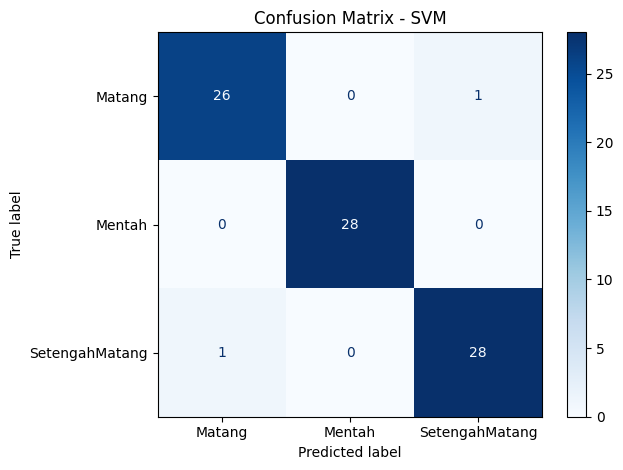

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# --- Confusion Matrix SVM ---
print("\n📊 Confusion Matrix - SVM")
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# ===== Simpan Hasil Prediksi ke CSV (untuk Uji McNemar) =====
df_pred_crop = pd.DataFrame({
    'Filename': X_test.index.map(lambda i: df.iloc[i]['Filename']),
    'Actual': y_test.values,
    'Predicted_SVM_Crop': svm_pred
})

crop_pred_path = '/content/drive/MyDrive/Penelitian/Skripsi/Crop/60.40/Prediksi/svm/Prediksi_SVM_Crop_60:40.csv'
df_pred_crop.to_csv(crop_pred_path, index=False)
print(f"\n✅ Hasil prediksi SVM (crop) disimpan di: {crop_pred_path}")


✅ Hasil prediksi SVM (crop) disimpan di: /content/drive/MyDrive/Penelitian/Skripsi/Crop/60.40/Prediksi/svm/Prediksi_SVM_Crop_60:40.csv
